# INFO 2950 Final Project - Phase II
##### Janice Shen (js3678), Khai Xin Kuan (kk996), Sandy Lin (sl2534), David Park (yp358)

### Abstract:
A common interest in both music and finance led the four of us to explore a unique intersection between these fields. Specifically, we asked: could individual music preferences be related to broader economic trends in the United States? Inspired by prior research that suggested promising correlations between music sentiment and market performance (e.g., weekly equity returns) , we decided to investigate further. While excited by the potential connections, our initial data analysis revealed only weak correlations between music sentiment and economic indicators. This prompted us to refine our approaches and think about regression models we could run for the next phase, hoping to reveal hidden trends. 


## Research Questions:
1. **Can the valence of the general population's music preference be predicted by economic indicators such as the unemployment rate, the federal funds rate, and other macroeconomic variables?**
   - *Valence* represents the spectrum of emotions in music, ranging from negative (0) to positive (1).
   - **Goal:** We sought to determine whether broader economic conditions influence the general emotional tone of music that people gravitate toward.

2. **How does danceability correlate with valence, and can we predict the danceability of the general population's music preference based on key economic variables?**
   - *Danceability* measures how suitable a track is for dancing, ranging from 0.0 (least danceable) to 1.0 (most danceable).
   - **Goal:** We explored whether this characteristic, often linked to musical enjoyment, also showed any connections to economic conditions.

### Initial Findings and Methodological Refinement:
Our original analysis included all songs in our dataset and yielded extremely weak correlations. We hypothesized that the inclusion of a large volume of less popular songs may have distorted the results, as these songs might not accurately reflect public sentiment or consumption patterns. To address this, we filtered out less popular songs using a *popularity* metric (a scale from 0 to 100, where 100 indicates the most popular songs). We created a cutoff of 70, focusing on the songs with popularity greater than 70 in our analysis to better capture the music that resonates with the general public.

**Goal:** Even after refining our data, we found weak correlations between music sentiment and the wider US economy. However, in future phases, we aim to obtain more meaningful insights into the relationship between music sentiments and economic variables, with the potential to reveal subtle but significant patterns. 

**Importing Packages**

In [3]:
import pandas as pd
import numpy as np
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression, LogisticRegression

## Data Description

#### What are the observations (rows) and the attributes (columns)?
**Observations**: Each row represents a song or an economic indicator for a specific time period. In the music dataset (musicdata), rows represent individual songs, while in the economic datasets (undata, econdata, us_gdp_data, us_entertainmentgdp_data), rows represent time intervals (e.g., months or quarters).  
**Attributes**: In the **music dataset**, the columns include variables like **valence** (a measure of positivity in music), **danceability**, **popularity**, **year**, and other sentiment-related metrics. For the **economic datasets** columns include **unemployment rate**, **GDP**, **federal funds rate**, and other economic indicators.


#### Why was this dataset created?  
The **music sentiment datasets** were created to explore the relationship between musical attributes (such as valence, danceability, and popularity) and factors like popularity or music trends over time. The **economic datasets** were generated by governmental agencies like the **Federal Reserve** to monitor key economic indicators for research, policy analysis, and public transparency.


#### Who funded the creation of the dataset?
The **music sentiment dataset** were compiled by independent researchers, such as Caleb Elgut, likely with no explicit funding. These data sources rely on platforms like **Spotify**, **Billboard**, and **ARIA**, which collected the original data. The **economic datasets** were funded by the U.S. government through organizations like the **Federal Reserve** and the **Federal Reserve Bank of St. Louis**, as part of their regular efforts to report and track national economic trends.


#### What processes might have influenced what data was observed and recorded and what was not?  
In the **music datasets**, factors like availability on Spotify, scraping techniques, and modern-day popularity metrics may have influenced the data observed. For example, older songs that were popular in the 1990s may have lower popularity today, potentially skewing the results when comparing them to historical economic data. In the **economic datasets**, revisions in how economic indicators like GDP and unemployment are calculated, government adjustments, and data collection methodologies could have impacted the recorded data. Additionally, the time series nature of the data means there may be adjustments due to seasonal variations or changes in reporting practices.


#### What preprocessing was done, and how did the data come to be in the form that you are using?  
- **Music datasets**: The data was scraped from platforms like **Spotify**. Preprocessing included cleaning missing values, and ensuring compatibility between different time periods in the analysis (there was no missing values when we loaded the files).  
- **Economic datasets**: The raw data provided by the **Federal Reserve** was merged and aligned with the music data for time-series analysis. Preprocessing involved cleaning missing values, ensuring consistent date formats, and aligning economic metrics with the appropriate historical periods for comparison with music data.


#### If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
- **Music datasets**: The data originates from public platforms like **Spotify**, where users are generally aware that their listening habits are tracked. However, artists and listeners would likely be unaware of this specific usage of the data for correlating music preferences with economic trends.  
- **Economic datasets**: Data on economic indicators is collected by government agencies like the **Federal Reserve**, with the understanding that it will be publicly available for research, policy analysis, and economic forecasting.


#### Where can your raw source data be found, if applicable?
1. **Music sentiment datasets**:  
   - Caleb Elgut's dataset scraped from Spotify can be found on GitHub: [Spotify-LSTM Data](https://github.com/calebelgut/spotify-lstm/tree/main/Data)  


2. **Economic datasets**:  
   - Abigail Larion’s dataset on economic indicators (including federal funds rate, real GDP, and unemployment rate) can be found on Kaggle: [Interest Rates Dataset](https://www.kaggle.com/datasets/federalreserve/interest-rates)  
   - Unemployment rate data from Jan 1948 – Sep 2024 is available through the Federal Reserve Economic Data (FRED) platform: [Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE)  
   - Quarterly GDP from Jan 1997 – 2019: [Quarterly GDP](https://fred.stlouisfed.org/series/GDP)  
   - Yearly GDP of the Music/Entertainment Industry from 1997 – 2019: [Entertainment Industry GDP](https://fred.stlouisfed.org/series/USPRFRMSPRTMSMNGSP)

We first loaded all the data:

In [4]:
#load all datasets
musicdata = pd.read_csv("top_music.csv")

In [5]:
fedFunds = pd.read_csv("FEDFUNDS.csv")
un = pd.read_csv("un.csv")
us_gdp_data = pd.read_csv("GDP.csv")
us_entertainmentgdp_data = pd.read_csv("USPRFRMSPRTMSMNGSP.csv")

## Data Cleaning

### Summary
We begin to inspect the first 3 datasets by using .head() and .shape to ensure we have enough data. Then we check if there is any NaN value. If there is, we dropped the value. For the fed fund rate (which is equivalent to interest rate), since the raw data gives us each month's fed fund rate, we average the 12 months to a by-yearly scale. We then create a new dataset that contains the average fed fund rate of the year that matches the yearly scale of the music sentiments. 

After cleaning, we created a new dataframe that contains only data that we are interested in exploring the relationship such as danceability, valence, year, interest rate, and unemployment rate by using Inner Join on year (SQL). 

However, after running our analysis, we realized that there was a weak correlation and wanted another dataset to cross check. Thus, we used the top10000 songdata in the second part of this project after inspecting and analyzing the first 3 data sets with the spotify dataset of music sentiments. 

### Cleaning Music Data

#### Checking Music Data and Handling Missing Values

In the music dataset(musicdata), we checked to see if NaN was present in any of our interested variables (danceability and valence) and whether actions needed to be taken to handle any missing values. We chose danceability and valence because these variables were columns that related to music sentiment the most--danceability tracks how "danceable", therefore "joyous" the track is; while valence tracks the "positivity", therefore how "happy" the project is. We first checked the songs that have the valence datapoint and whether any songs have nan for valence. We then checked the songs that have the danceability data points and whether any songs have NaN for danceability.

In [16]:
musicdata.head()

,Year,Rank,Artist,Song,valence,danceability,energy,tempo
0,1960,1,percy faith,theme from a summer place,0.9130,0.325,0.4120,186.720
1,1960,2,jim reeves,hell have to go,0.1905,0.533,0.2435,81.068
2,1960,3,everly brothers,cathys clown,0.8660,0.498,0.5820,119.809
4,1960,5,mark dinning,teen angel,0.3300,0.447,0.1820,95.094
5,1960,6,brenda lee,im sorry,0.3030,0.558,0.2230,101.711


In [17]:
# checking to see if we have NaN values
print("Number of music valence: ", len(musicdata['valence']))
print("Nan is present: ",\
      np.isnan(musicdata['valence']).any())

Number of music valence:  4006
Nan is present:  False


In [18]:
newmusicdata = musicdata.dropna(subset='valence')

In [19]:
# checking to see if we have NaN values
print("Number of music danceability: ", len(newmusicdata['danceability']))
print("Nan is present: ",\
      np.isnan(newmusicdata['danceability']).any())

Number of music danceability:  4006
Nan is present:  False


In [20]:
newmusicdata.head()

,Year,Rank,Artist,Song,valence,danceability,energy,tempo
0,1960,1,percy faith,theme from a summer place,0.9130,0.325,0.4120,186.720
1,1960,2,jim reeves,hell have to go,0.1905,0.533,0.2435,81.068
2,1960,3,everly brothers,cathys clown,0.8660,0.498,0.5820,119.809
4,1960,5,mark dinning,teen angel,0.3300,0.447,0.1820,95.094
5,1960,6,brenda lee,im sorry,0.3030,0.558,0.2230,101.711


In [21]:
countyear= duckdb.sql("""SELECT Year, COUNT(Year) AS Count
                        FROM newmusicdata 
                        GROUP By Year 
                        ORDER BY Year""").df()
countyear

,Year,Count
0,1960,83
1,1961,76
2,1962,76
3,1963,81
4,1964,42
5,1965,51
6,1966,49
7,1967,51
8,1968,54
9,1969,52


Text(0.5, 1.0, 'Number of popular songs in each year')

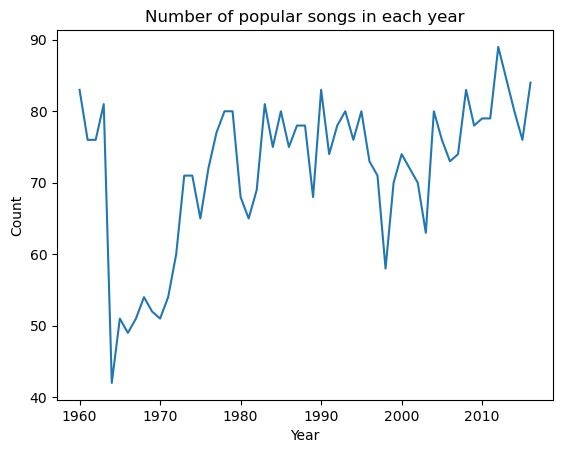

In [22]:
songsinyear_graph = sns.lineplot(countyear, x="Year", y="Count")
plt.title('Number of popular songs in each year')

#### Gathering Popular Songs From Music Data

*Popularity measures the popularity of the track within the music dataset.* However, since the dataset is so large, we wanted basic stats on the dataset, including the mean, mode, and median to decide the cut off point. These data allows us to see which number occurs the most and if there is any skewness in the popularity of the average song. 

In [ ]:
# #check the mean, mode and median of songs' popularity
# print(musicdata['popularity'].mean())
# print(musicdata['popularity'].mode())
# print(musicdata['popularity'].median())

#### Cleaning Music Data

We cleaned the data and made a dataframe containing only the variables that we are interested in such as year, danceability, valence, and songs above a certain level of popularity, which in this case 70. As indicated by the mode from the above statistics, the popularity of 0 is the most common occurrence with the songs in the dataset. Therefore, we wanted to filter out the popular songs more indicative of the general public's music preference rather than also include music enjoyed by few individuals. However, at the same time, we don't want our dataset to be too small. Therefore, we chose to keep songs that have a popularity of at least 70. 

In [ ]:
# newmusicdata= duckdb.sql("SELECT danceability, valence, year, \
#             popularity FROM musicdata WHERE popularity>=70").df()

# newmusicdata

#### Analyzing Uneven Distribution of Song Data

With the popularity set to 70, we wanted to check how the songs are distributed across the years based on popularity, and we noticed a problem. There are a very limited number of data points of songs in the earlier years (based on popularity filter), while there are a lot more songs in recent years. 

In [ ]:
# # count the number of songs available for each year
# songsinyear = duckdb.sql("SELECT COUNT(Year) AS Count, Year FROM \
#             newmusicdata GROUP BY Year ORDER BY Count DESC").df()
# songsinyear.head(64)

In [ ]:
# songsinyear_graph = sns.lineplot(songsinyear, x="year", y="Count")
# plt.title('Number of popular songs in each year')

As we have an uneven number of songs for each year, we thought it would cause some sort of issue with our analysis later. 
Therefore, we decided to only include songs from 2000 to 2017, as the number of songs in that period seem relatively similar. 

In [ ]:
# # look at the mean, median of danceability and valence for each year 
# newmusicdata = duckdb.sql("SELECT danceability, valence, year \
#         FROM newmusicdata WHERE year>=2000 AND year<=2017").df()
# newmusicdata


### Cleaning Econ Data

#### Manipulating Econ Data and Handling Missing Values

We checked the Effective Federal Funds Rate for the number of data and checked to see if any missing values were present. 

In [30]:
econdata = un.merge(fedFunds, how="left")
econdata

,DATE,UNRATE,FEDFUNDS
0,1948-01-01,3.4,NaN
1,1948-02-01,3.8,NaN
2,1948-03-01,4.0,NaN
3,1948-04-01,3.9,NaN
4,1948-05-01,3.5,NaN
...,...,...,...
916,2024-05-01,4.0,5.33
917,2024-06-01,4.1,5.33
918,2024-07-01,4.3,5.33
919,2024-08-01,4.2,5.33


In [31]:
# checking to see if we have NaN values
print("Number of rows in fed fund rate: ", \
      len(econdata['FEDFUNDS']))
print("Nan is present: ",\
      np.isnan(econdata['FEDFUNDS']).any())

Number of rows in fed fund rate:  921
Nan is present:  True


To avoid any potential problems with graphs down the line, we dropped all the NaN values. After dropping all the Nans from our dataset, we then checked to see how many data points are now there. 

In [32]:
#Nan vaue is found, drop it 
econdata.dropna(subset=['FEDFUNDS'], inplace=True)
print(np.isnan(econdata['FEDFUNDS']).any())
#check the shape to see if we have enough data
print(econdata.shape)


False
(843, 3)


We renamed the 'Effective Federal Funds Rate' column in econdata to 'fedfundrate' to simplify every time we have to refer to the specific column.

In [33]:
#rename the FEDFUNDS col, easier without space for writing SQL later
print(econdata.columns)
econdata.rename(columns={"FEDFUNDS": "fedfundrate"}, inplace=True)
print(econdata.columns)

Index(['DATE', 'UNRATE', 'FEDFUNDS'], dtype='object')
Index(['DATE', 'UNRATE', 'fedfundrate'], dtype='object')


Since the fed fund rate is updated on a monthly basis, we averaged the fed fund rate over a 12 month period to get the average yearly fed fund rate since we want to make it the equalize the time periods with musicdata.

#### Checking and Manipulating Unemployment Data 

We checked the Unemployment data for the number of data points that were there and also see if any missing values were present. 

In [34]:
# checking to see if we have NaN values
print("Number of rows in UNRate: ", len(econdata['UNRATE']))
print("Nan is present: ",\
      np.isnan(econdata['UNRATE']).any())

Number of rows in UNRate:  843
Nan is present:  False


We converted date to datetime to allow for a more comprehensive merge later on. 

In [35]:
# in order to merge the data, we need to convert the date format into datetime

#check date type
print(econdata["DATE"].dtype)
# convert to datetime format
econdata['DATE']= pd.to_datetime(econdata['DATE'], \
                               format='%Y-%m-%d', errors='coerce')
econdata

object


,DATE,UNRATE,fedfundrate
78,1954-07-01,5.8,0.80
79,1954-08-01,6.0,1.22
80,1954-09-01,6.1,1.07
81,1954-10-01,5.7,0.85
82,1954-11-01,5.3,0.83
...,...,...,...
916,2024-05-01,4.0,5.33
917,2024-06-01,4.1,5.33
918,2024-07-01,4.3,5.33
919,2024-08-01,4.2,5.33


Since the unemployment rate data is given on a monthly scale, we averaged the 12-month unemployment to get a yearly average unemployment rate to allow the data to be merged with the Spotify dataset later on. 


In [36]:
# modify undata to find avg unrate for each year
econdata = duckdb.sql("SELECT year(DATE) AS Year, AVG(UNRATE)\
        AS UnemploymentRate, AVG(fedfundrate) AS fedfundrate,\
        FROM econdata GROUP BY year(DATE)").df()
econdata

,Year,UnemploymentRate,fedfundrate
0,1954,5.650000,1.008333
1,1955,4.366667,1.785000
2,1956,4.125000,2.728333
3,1957,4.300000,3.105000
4,1958,6.841667,1.572500
...,...,...,...
66,2021,5.350000,0.080000
67,2022,3.633333,1.683333
68,2023,3.625000,5.024167
69,2024,4.000000,5.307778


#### Renaming US GDP 


In [37]:
# rename US GDP col for easier reference
us_gdp_data = us_gdp_data.rename(columns={"GDP": "US_GDP"})
us_gdp_data

,DATE,US_GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
305,2023-04-01,27453.815
306,2023-07-01,27967.697
307,2023-10-01,28296.967
308,2024-01-01,28624.069


#### Renaming Entertainment GDP

Since the entertainment GDP has a random name, we renamed the dataset to entertainment_GDP for easier reference later on. 

In [38]:
# rename entertainmentgdp col for easier reference
us_entertainmentgdp_data = us_entertainmentgdp_data.rename(\
        columns={"USPRFRMSPRTMSMNGSP": "Entertainment_GDP"})
us_entertainmentgdp_data

,DATE,Entertainment_GDP
0,1997-01-01,37156.0
1,1998-01-01,40614.0
2,1999-01-01,44509.0
3,2000-01-01,49295.0
4,2001-01-01,51812.0
5,2002-01-01,56935.0
6,2003-01-01,61956.0
7,2004-01-01,65072.0
8,2005-01-01,67060.0
9,2006-01-01,73485.0


#### Merging US GDP and Entertainment GDP 

We merged the total US_GDP with the Entertainment_GDP at a yearly scale on January 1st to see if there is a relationship between US_GDP and Entertainment_GDP. We want to confirm that the Entertainment GDP has a strong correlation with the US GDP. Since the Entertainment GDP and US GDP are different indicators, we want to see if music sentiment has any relationship with the US GDP at large vs its relationship with the entertainment GDP. 

In [39]:
# merge the 2 datasets tgt on date. (only interested in jan 1st 
#since entertainmentgdp dataset only has jan 1st data
gdp_entgdp_df = pd.merge(us_gdp_data, us_entertainmentgdp_data, how="inner", on="DATE")


gdp_entgdp_df['DATE']= pd.to_datetime(gdp_entgdp_df['DATE'], \
                                      format='%Y-%m-%d', errors='coerce')

gdp_entgdp_df = duckdb.sql("SELECT year(DATE) AS Year,\
            US_GDP, Entertainment_GDP FROM gdp_entgdp_df").df()


gdp_entgdp_df
 

,Year,US_GDP,Entertainment_GDP
0,1997,8362.655,37156.0
1,1998,8866.480,40614.0
2,1999,9411.682,44509.0
3,2000,10002.179,49295.0
4,2001,10470.231,51812.0
5,2002,10783.500,56935.0
6,2003,11174.129,61956.0
7,2004,11923.447,65072.0
8,2005,12767.286,67060.0
9,2006,13599.160,73485.0


### Getting It All Together


Next, we merged all of the data frames together to create one comprehensive overview of all the present information. We merged the data frame with the music sentiment(danceability, valence, year) with the fedfundrate dataframe, unemploymentRate dataframe, and the GDP dataframe. This allows us to see how certain economic metrics affect the music sentiment shared by the general public. 

In [45]:
# use sql to get a data frame with danceabilty, valence, interest rate and unemployment
cleandata= duckdb.sql("SELECT danceability,valence, \
            newmusicdata.Year AS year, fedfundrate, UnemploymentRate FROM \
            newmusicdata INNER JOIN econdata ON \
            newmusicdata.Year = econdata.Year").df()
cleandata= duckdb.sql("SELECT danceability,valence, \
        cleandata.Year, \
        fedfundrate, UnemploymentRate, US_GDP, \
        Entertainment_GDP FROM cleandata INNER JOIN gdp_entgdp_df\
        ON cleandata.year = gdp_entgdp_df.year").df()
cleandata

,danceability,valence,year,fedfundrate,UnemploymentRate,US_GDP,Entertainment_GDP
0,0.4500,0.3670,1997,5.460,4.941667,8362.655,37156.0
1,0.6175,0.1140,1997,5.460,4.941667,8362.655,37156.0
2,0.5500,0.0438,1997,5.460,4.941667,8362.655,37156.0
3,0.6180,0.5610,1997,5.460,4.941667,8362.655,37156.0
4,0.7150,0.6120,1997,5.460,4.941667,8362.655,37156.0
...,...,...,...,...,...,...,...
1424,0.3550,0.1370,2016,0.395,4.875000,18525.933,120037.0
1425,0.7180,0.2050,2016,0.395,4.875000,18525.933,120037.0
1426,0.6030,0.3040,2016,0.395,4.875000,18525.933,120037.0
1427,0.6890,0.2830,2016,0.395,4.875000,18525.933,120037.0


## Exploratory Data Analysis

### Correlation visualization and analysis


Using the large data frame that contains all relevant information about both the music sentiments and the economic metrics, we made a correlation matrix, examining the correlation of how and if certain economic variables correspond with a certain change in music sentiments. 

Although we note that there is a strong correlation between US_GDP and Entertainment_GDP (0.993423), US_GDP and year (0.995226), and Entertainment_GDP and Year (0.995377). However, since our research question aims to tackle the relationship between music sentiment variables (valence, danceability) with key economic indicators, we discern these strong correlations to be deemed as insignificant.

With that said, the correlation matrix reveals no strong relationship between music sentiment and different economic factors. 

The strongest relationship is between US GDP and valence with a negative correlation of -0.20. Valence and fedfundrate also have a weak positive relationship of 0.13. Valence and the Unemployment rate have a weak positive relationship of 0.09. 

The correlation is even worse for danceability, where the correlation between danceability and all other economic metrics (fedfundrate, unemployment rate, and US GDP) are < 0.05. 

In [46]:
cleandata.corr()

,danceability,valence,year,fedfundrate,UnemploymentRate,US_GDP,Entertainment_GDP
danceability,1.000000,0.429290,-0.043354,0.052607,-0.076175,-0.039065,-0.040861
valence,0.429290,1.000000,-0.095824,0.050868,0.006168,-0.100946,-0.097952
year,-0.043354,-0.095824,1.000000,-0.788433,0.463324,0.995119,0.996849
fedfundrate,0.052607,0.050868,-0.788433,1.000000,-0.716666,-0.737536,-0.783298
UnemploymentRate,-0.076175,0.006168,0.463324,-0.716666,1.000000,0.397414,0.433149
US_GDP,-0.039065,-0.100946,0.995119,-0.737536,0.397414,1.000000,0.991545
Entertainment_GDP,-0.040861,-0.097952,0.996849,-0.783298,0.433149,0.991545,1.000000


### Plotting Within Music Sentiment Variables: Danceability vs Valence

We visualize how valence trends with danceability over time because we want to observe any peculiarities that may have skewed the correlation result. As observed in the correlation matrix above, we saw that the correlation between valence and danceability is 0.41, which was surprising as we expected it to be higher. Therefore, we plotted it to if the direction that both variables moved were always different or if there was something else going on. From the graph, we can see that the overall trend between danceability and valence is mostly similar, except for the period from 2012 onwards, where danceability increases while valence decreases.

Text(0.5, 1.0, 'Danceability agaisnt Valence')

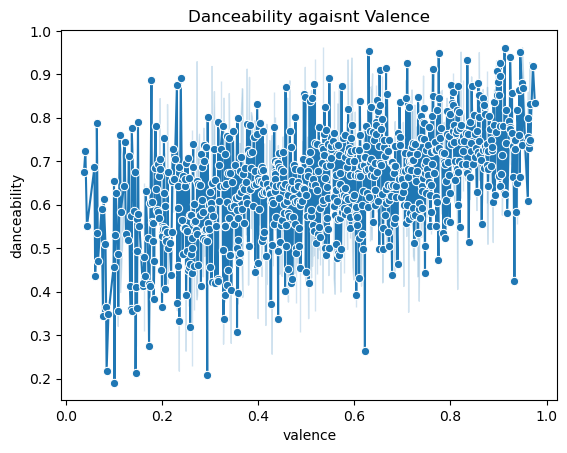

In [62]:
sns.lineplot(x="valence", y="danceability", data= cleandata, marker="o")
plt.title('Danceability agaisnt Valence')

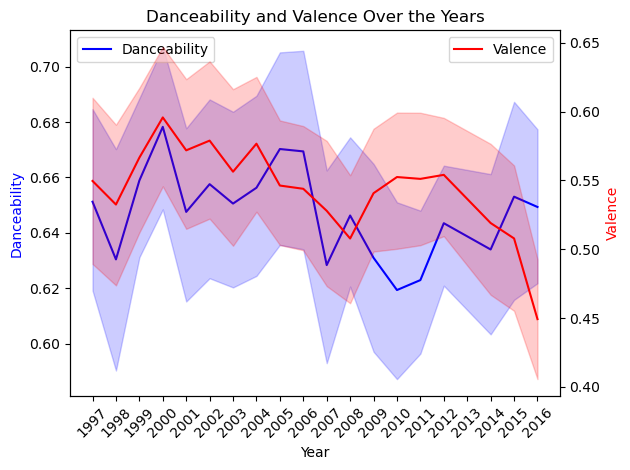

In [47]:
# visualize time series of valence and danceability across the years
fig, ax1 = plt.subplots()

sns.lineplot(x='year', y='danceability', data=cleandata,\
    ax=ax1, color='blue', label='Danceability')
ax1.set_ylabel('Danceability', color='blue') 

ax2 = ax1.twinx()

sns.lineplot(x='year', y='valence', data=cleandata, \
    ax=ax2, color='red', label='Valence')
ax2.set_ylabel('Valence', color='red') 

ax1.set_title('Danceability and Valence Over the Years')
ax1.set_xlabel('Year')

# fix legends: Add them manually by using the correct handles
lines1, _ = ax1.get_legend_handles_labels()
lines2, _ = ax2.get_legend_handles_labels() 

# add both legends to ax1, ensuring the labels are correct
ax1.legend(lines1, ['Danceability'], loc='upper left')
ax2.legend(lines2, ['Valence'], loc='upper right')

# reseting the x-axis ticks to be per year
years = np.arange(int(cleandata['year'].min()),\
    int(cleandata['year'].max()) + 1, 1)
ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45) 

plt.tight_layout() 
plt.show()

### Plotting To Visualize the Trends Between Different Music Variables Vs Different Economic Variables

#### Music Sentiment vs. Federal Fund Rate

As we start our exploration with music variables with economic variables, we first plot the two music sentiment variables with the federal fund rate to visualize why the federal fund rate vs. valence has the strongest correlation (albeit being a weak correlation) amongst economic variables, while having only a -0.01 correlation for federal fund rate vs. danceability.

 We first plotted fedfundrate against valence across the years. Interestingly, we do observe fedfundrate and valence going in similar directions. However, the spikes for fedfundrate are a lot more extreme, with extreme ups and extreme downs. On the other hand, valence progresses a lot more steadily, with a steady decline over time. 

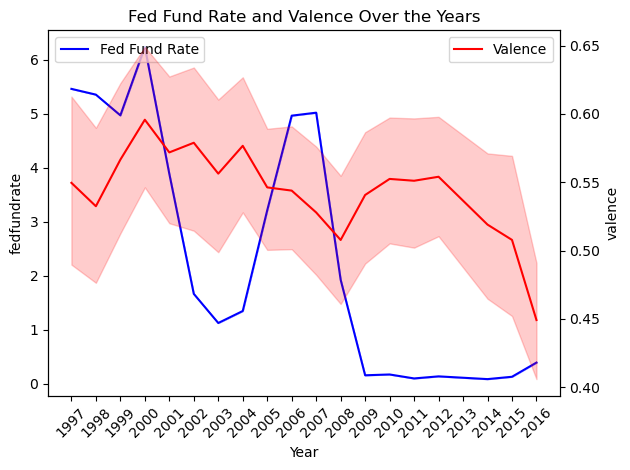

In [48]:
# visualize time series of valence and fedfundrate across the years
fig, ax1 = plt.subplots()
sns.lineplot(x='year', y='fedfundrate', data=cleandata, \
    ax=ax1, color='blue', label='fedfundrate')
ax2 = ax1.twinx()
sns.lineplot(x='year', y='valence', data=cleandata, \
    ax=ax2, color='red', label='valence')

ax1.set_title('Fed Fund Rate and Valence Over the Years')
ax1.set_xlabel('Year')

lines1, _ = ax1.get_legend_handles_labels() 
lines2, _ = ax2.get_legend_handles_labels()  

ax1.legend(lines1, ['Fed Fund Rate'], loc='upper left')
ax2.legend(lines2, ['Valence'], loc='upper right')

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45) 

plt.tight_layout() 
plt.show()

We then plotted fedfundrate against danceability. We don't observe any trend between the two variables. While Danceability remained stable, fedfundrate had a large spike, which later plummeted. 

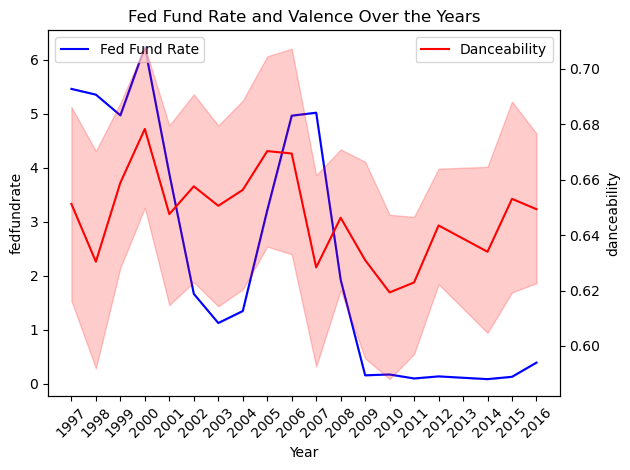

In [49]:
# visualize time series of danceability and fedfundrate across the years
fig, ax1 = plt.subplots()
sns.lineplot(x='year', y='fedfundrate', data=cleandata, \
    ax=ax1, color='blue', label='fedfundrate')
ax2 = ax1.twinx()
sns.lineplot(x='year', y='danceability', data=cleandata,\
    ax=ax2, color='red', label='danceability')


ax1.set_title('Fed Fund Rate and Valence Over the Years')
ax1.set_xlabel('Year')

lines1, _ = ax1.get_legend_handles_labels()  # Get handles for ax1
lines2, _ = ax2.get_legend_handles_labels()  # Get handles for ax2

ax1.legend(lines1, ['Fed Fund Rate'], loc='upper left')
ax2.legend(lines2, ['Danceability'], loc='upper right')

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45) 

plt.tight_layout() 
plt.show()

#### Music Variables vs. Unemployment Rate

We also examine the relationship between music variables vs. unemployment rate to explain why we see similar correlation patterns: why is unemployment rate with valence slightly positive (0.09) while being extremely weakly negative (-0.01) with danceability? Also, we aim to see if we could observe any patterns despite the weak correlations.

Next, we looked at the relationship between the unemployment rate and valence. The plot doesn't seem to indicate any trends between unemployment Rate and valence Throughout the lineplot, valence seems to be steadily going down while the unemployment rate seems to be spiking up and down. 

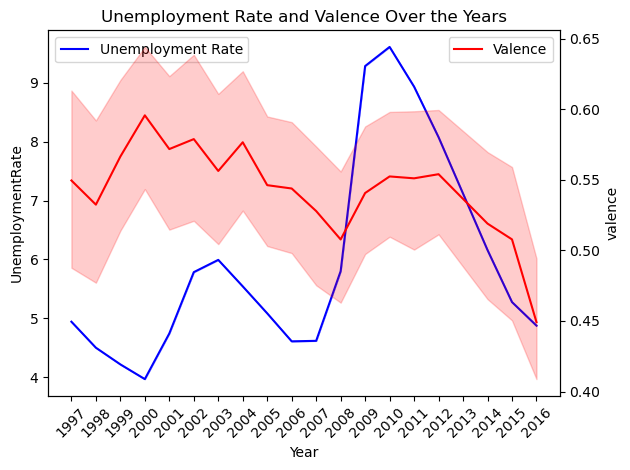

In [50]:
# visualize time series of valence and unemploymentrate across the years
fig, ax1 = plt.subplots()
sns.lineplot(x='year', y='UnemploymentRate', data=cleandata, ax=ax1,\
    color='blue', label='UnemploymentRate')
ax2 = ax1.twinx()
sns.lineplot(x='year', y='valence', data=cleandata, ax=ax2, \
    color='red', label='valence')

ax1.set_title('Unemployment Rate and Valence Over the Years')
ax1.set_xlabel('Year')

lines1, _ = ax1.get_legend_handles_labels()
lines2, _ = ax2.get_legend_handles_labels()
ax1.legend(lines1, ['Unemployment Rate'], loc='upper left')
ax2.legend(lines2, ['Valence'], loc='upper right')

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45) 

plt.tight_layout() 
plt.show()


We then plotted danceability with unemployment. Again, given the low correlation in the correlation matrix, these two factors interestingly look like they have a relationship. While unemployment spiked more severely over the years, with ups and downs, music danceability follows a similar trend but remains more steady around a small range. 

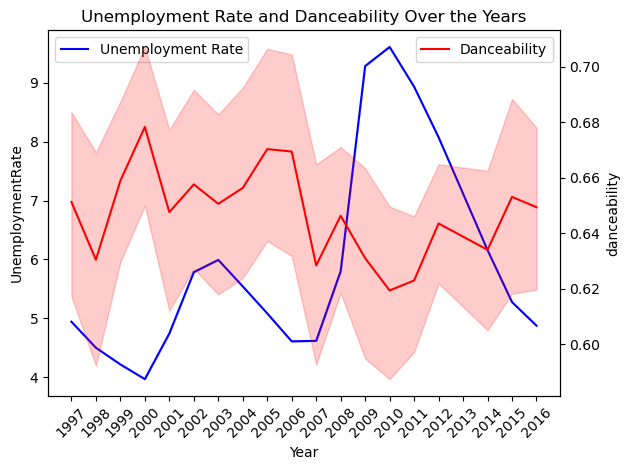

In [51]:
# visualize time series of danceability and unemploymentrate across the years
fig, ax1 = plt.subplots()
sns.lineplot(x='year', y='UnemploymentRate', data=cleandata, ax=ax1, \
    color='blue', label='UnemploymentRate')
ax2 = ax1.twinx()
sns.lineplot(x='year', y='danceability', data=cleandata, ax=ax2, \
    color='red', label='danceability')

ax1.set_title('Unemployment Rate and Danceability Over the Years')
ax1.set_xlabel('Year')

lines1, _ = ax1.get_legend_handles_labels()
lines2, _ = ax2.get_legend_handles_labels()
ax1.legend(lines1, ['Unemployment Rate'], loc='upper left')
ax2.legend(lines2, ['Danceability'], loc='upper right')

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45) 

plt.tight_layout() 
plt.show()

#### Music Data vs. US GDP

We then plotted danceability with US GDP. There appears to be no correlation as danceability remains stable, while US GDP increased throughout the year, danceability remains similar, oscillating slightly in the center. 

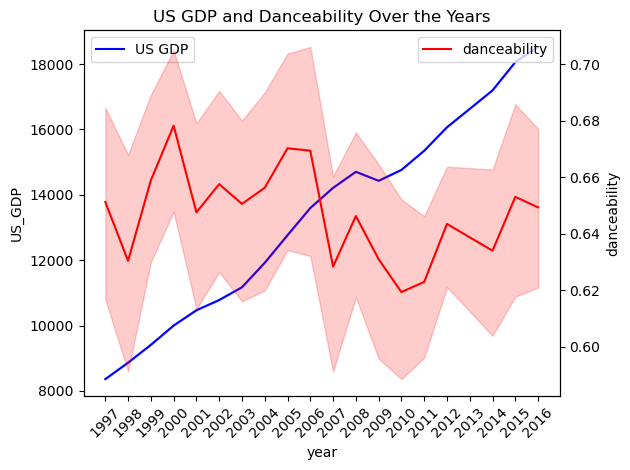

In [52]:
fig, ax1 = plt.subplots()
sns.lineplot(x='year', y='US_GDP', data=cleandata, ax=ax1, 
             color='blue', label='US GDP')
ax2 = ax1.twinx()
sns.lineplot(x='year', y='danceability', data=cleandata, ax=ax2, 
             color='red', label='danceability')
plt.title('US GDP and Danceability Over the Years')

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45) 

plt.tight_layout() 
plt.show()

We then plotted valence with US GDP. There appears to be negative correlation. While valence steadily and slowly decreased over time, US GDP increased linearly over time. 

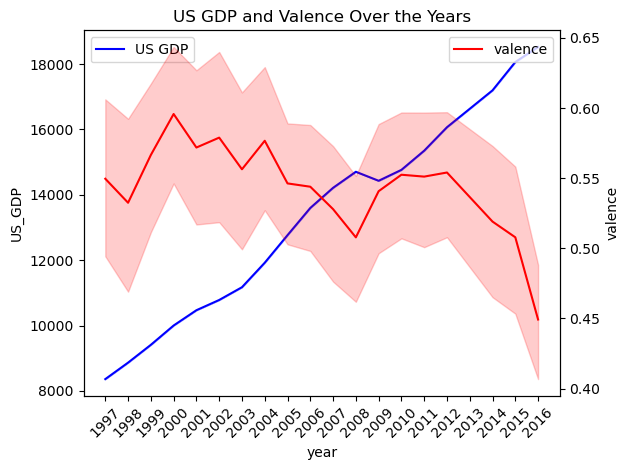

In [53]:
fig, ax1 = plt.subplots()
sns.lineplot(x='year', y='US_GDP', data=cleandata, ax=ax1, \
             color='blue', label='US GDP')
ax2 = ax1.twinx()
sns.lineplot(x='year', y='valence', data=cleandata, 
             ax=ax2, color='red', label='valence')
plt.title('US GDP and Valence Over the Years')

ax1.set_xticks(years)
ax1.set_xticklabels(years, rotation=45) 

plt.tight_layout() 
plt.show()

### Scatterplot to Analyze Data Points 

With the scatterplot, we inspect why dancebility and valence has such weak correlation with fedfundrate and unemploymentrate by plotting scatter plots. To demonstrate this, we reduce the transparency of the dot to make sure we can determine overlapping to get more accurate perceptions of the range of songs' danceability and valence. We found out that regardless of the fed fund rate and unemployment rate, we have songs with a full spectrum of danceability and valence. This might justify why there is a weak correlation.



Scatterplot for fedfundrate and danceability. Danceability seems to generally shift up (become higher) when interest rate increases. 

Text(0.5, 1.0, 'Scatterplot for Federal Fund Rate and Danceability')

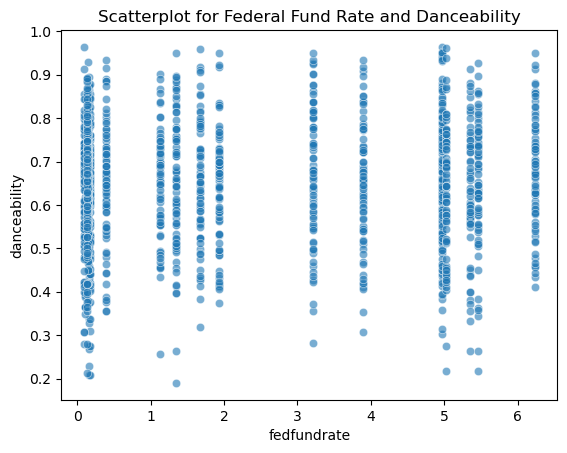

In [54]:
dance_fedfund_graph= sns.scatterplot(cleandata, x="fedfundrate",\
                                     y="danceability", alpha=0.6)
plt.title('Scatterplot for Federal Fund Rate and Danceability')

Scatterplot for fedfundrate and valence. There appears to be a wide range of valence across all fedfundrate. 

Text(0.5, 1.0, 'Scatterplot for Federal Fund Rate and Valence')

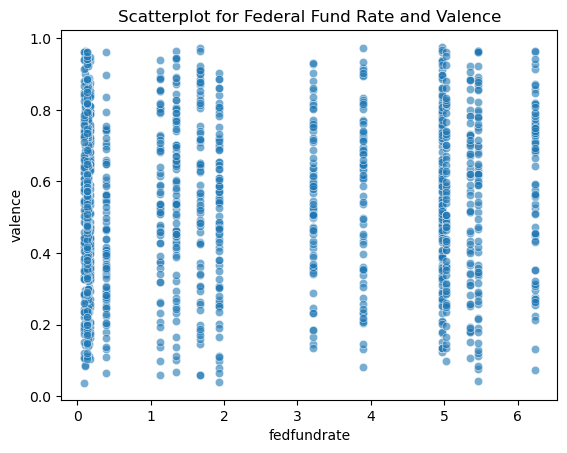

In [55]:
valence_fedfund_graph= sns.scatterplot(cleandata, \
                    x="fedfundrate", y="valence", alpha=0.6)
plt.title('Scatterplot for Federal Fund Rate and Valence')

Scatterplot for unemployment rate and valence. There appears to be a wide range of danceability across all unemployment rate. However, the range of danceability seems to be slightly smaller when unemployment rate increases. 

Text(0.5, 1.0, 'Scatterplot for Unemployment Rate and Danceability')

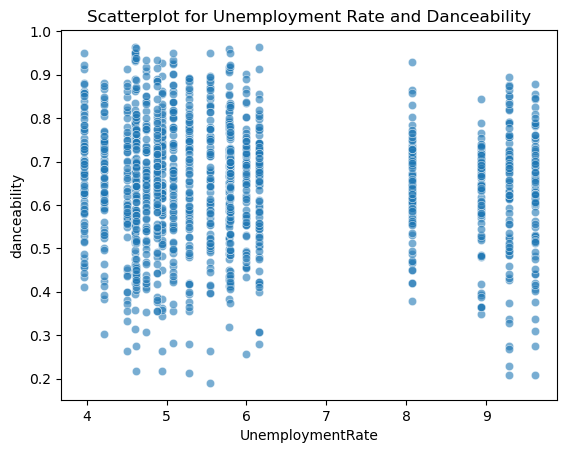

In [56]:
dance_un_graph= sns.scatterplot(cleandata, x="UnemploymentRate", \
                                y="danceability", alpha=0.6)
plt.title('Scatterplot for Unemployment Rate and Danceability')

Scatterplot for unemployment rate and valence. There appears to be a wide range of valence across all unemployment rate.

Text(0.5, 1.0, 'Scatterplot for Unemployment Rate and Valence')

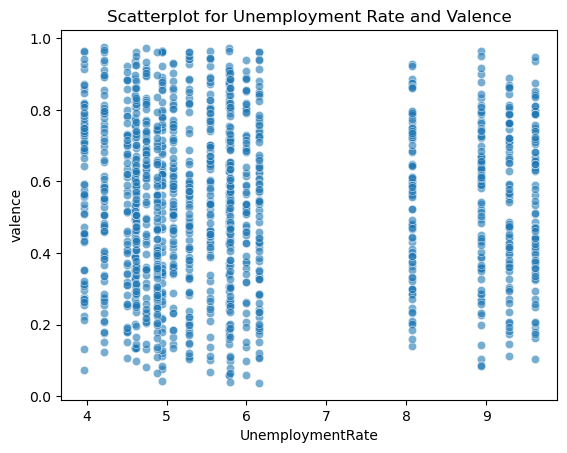

In [57]:
valence_un_graph= sns.scatterplot(cleandata, x="UnemploymentRate", \
                                  y="valence", alpha=0.6)
plt.title('Scatterplot for Unemployment Rate and Valence')

### Data Limitation

From our journey of exploring the relationship between music sentiment and key economic variables, we came to the realization that *the navigation of the relationship we aim to discover in simplistic terms requires a further extension of qualitative research*, **especially in terms of addressing which data sources we ought to reconsider and how we address the vast range of music sentiments, and in terms of addressing the complex musical and economic natures**. 

To address this problem, we primarily used the Spotify (to get the quantitative values for music sentiment) dataset. Yet, it might be true that the **popularity column of Spotify commits recency bias. In other words, songs that were recently published are significantly more popular than the older ones**. Such matter of wrongful bias could offer explanation in why we are yet to find tracks that is evenly distributed across the years, and our methodologies must be improved to better accurately represent the most representative songs across the decade. Therefore, further exploration of methods to attain better--or more evenly distributed--data must be considered. For example, in the further phases of our analysis, we could use *Billboard charts*, the most well-known American music charting organization, across the years *and link it to the Spotify data* to normalize our distribution across time, and also have a better representation in what the American public listened to at their respective times.

Even if we do solve the inequalities of the number of tracks across the years, we must **question the complex nature of music**. Indeed, the preference of vibes are from human endeavor, thus the possibility of those realms being connected by human endeavor and psychological elements can be held. Yet, the factor of *time* makes our relationship with music so excitingly complex. You ask a man in post-World War II--a pompous time in America--what music he listens to, and he'll answer *cool jazz* (a music with solemn vibes); you ask another man of the late 2000s--a desolate time amidst the sub-prime mortgage crisis--what music he plays on repeat, and he'll answer *electronic dance music*. Hence, the variability of musical preference is so severe--not only across time, but across individuals--that pinpointing this into a limited number of songs insults the rich nature of human complexity with music.

The **economic structure can not be watered down into simplicity either**. Economics, even at the micro scale, is yet to offer a simple equation albeit the centuries of studies by the erudite. The elements of psychology, rational thinking, complex mathematics makes it even harder for one to fully comprehend the damned nature of individual interactions between one party with another. Now, consider the national scale, where many of the key economic indicators we've put in our analysis is a result of millions of interactions. Then, consider governments and federal institutions with different political leanings, of which might enact contrasting monetary and/or fiscal policies even with similar economic conditions. **The multitude of parties and factors involved that produce our key economic indicators explain why music sentiments might not directly show the a strong corelation with one of the economical index we used in our analysis.**

Another limitation we have is that because **the popular songs that we have for each year is uneven**, we decided to only include popular songs from 2000-2015 where the number of songs is relatively even. This step in data cleaning not only reduce the number of data entries we have but also restrict our datasets to not have recent popular songs. 

**Therefore, complexities in addressing the data, addressing sentiment, and addressing economy are reasons why we believe that further discussion and research is needed.** Given the complexities of these realms, the over-simplification to a couple of numbers "algorithmically" produced by Spotify and a couple of economic statistics can explain the reason why we are yet to find a strong relationship. Thankfully, by adding more variables or implementing better methods of standardization, we are able to at least progress in our question.

## Questions
- Given that we are not able to use models other than regression models, should we try to limit our scope of research so that we could produce a better model for our project?
    - For example, would examining the impact of COVID to key economical indicators and music sentiment help us make a better model?
    - Yet, if the aim of regression models is to predict, how can fit in the predictive part of our project if we constrict our model with a certain time period?
- What would alternative methods to constrict our data other than time?
    - Could genre be one? Tempo? or constricting the range of interest rates? unemployment rates?
- In contrast, can we expand/modify our research question so that we could look at different realms (other than music and economics)?
    - For example, can we modify our question so that we look at statistics such as population rates or prison rates and relate that to music sentiment?

### Reference
1. Plot 2 y variables in a graph: https://stackoverflow.com/questions/55654500/seaborn-plot-with-second-y-axis